## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt

In [2]:
pd.options.display.max_rows = 200
# pd.options.display.max_rows

In [3]:
# os.getcwd()
# os.chdir('C:\\gitlab\\covid19')

In [4]:
#Import files to use with API's
county_path = 'Resources/us_counties_states.csv'
date_path = 'Resources/dates.csv'

In [5]:
# us_counties_df = pd.read_csv(county_path)
# Create a filter to bring in only California and Indiana
# mask1 = us_counties_df['State'] != 'California'
# mask2 = us_counties_df['State'] != 'Indiana'
# us_counties_df = us_counties_df[mask1 & mask2]
# us_counties_df.head()
us_counties_df = pd.read_csv(county_path)

In [6]:
date_df = pd.read_csv(date_path)

In [7]:
# mask1 = date_df['Date']>'2020-10-10'
# date_df=date_df[mask1]
# date_df.head()

### API Calls to Pull Coronavirus Data by County

In [8]:
county_list = []
state_list = []
county_list = us_counties_df['County, State'].tolist()
# date_list = date_df['Date'].tolist()
# date_list = ['2020-10-24']

date_list = []
rundate = dt.date.today() - dt.timedelta(days=1)
rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
date_list.append(rundate)
date_list

['2020-10-26']

In [9]:
# state='Indiana'
# county='Fulton'
# date_val = rundate
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [10]:
# # Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 1

for date_val in date_list:    
    try:        
#         set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    

            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')
                
        set_counter += 1
        
    except:
        print(f'Date Error: {date_val} was not processed')
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Autauga, Alabama, 2020-10-26.
Processing record 2 of set 1 | Baldwin, Alabama, 2020-10-26.
Processing record 3 of set 1 | Barbour, Alabama, 2020-10-26.
Processing record 4 of set 1 | Bibb, Alabama, 2020-10-26.
Processing record 5 of set 1 | Blount, Alabama, 2020-10-26.
Processing record 6 of set 1 | Bullock, Alabama, 2020-10-26.
Processing record 7 of set 1 | Butler, Alabama, 2020-10-26.
Processing record 8 of set 1 | Calhoun, Alabama, 2020-10-26.
Processing record 9 of set 1 | Chambers, Alabama, 2020-10-26.
Processing record 10 of set 1 | Cherokee, Alabama, 2020-10-26.
Processing record 11 of set 1 | Chilton, Alabama, 2020-10-26.
Processing record 12 of set 1 | Choctaw, Alabama, 2020-10-26.
Processing record 13 of set 1 | Clarke, Alabama, 2020-10-26.
Processing record 14 of set 1 | Clay, Alabama, 2020-10-26.
Processing record 15 of set 1 | Cleburne, Alabama, 2020-10-26.
Processing record 16 of set 1 | Coffee, Alabama, 2020-10-26.
Processing record 17 of 

Processing record 111 of set 1 | Crittenden, Arkansas, 2020-10-26.
Processing record 112 of set 1 | Cross, Arkansas, 2020-10-26.
Processing record 113 of set 1 | Dallas, Arkansas, 2020-10-26.
Processing record 114 of set 1 | Desha, Arkansas, 2020-10-26.
Processing record 115 of set 1 | Drew, Arkansas, 2020-10-26.
Processing record 116 of set 1 | Faulkner, Arkansas, 2020-10-26.
Processing record 117 of set 1 | Franklin, Arkansas, 2020-10-26.
Processing record 118 of set 1 | Fulton, Arkansas, 2020-10-26.
Processing record 119 of set 1 | Garland, Arkansas, 2020-10-26.
Processing record 120 of set 1 | Grant, Arkansas, 2020-10-26.
Processing record 121 of set 1 | Greene, Arkansas, 2020-10-26.
Processing record 122 of set 1 | Hempstead, Arkansas, 2020-10-26.
Processing record 123 of set 1 | Hot Spring, Arkansas, 2020-10-26.
Processing record 124 of set 1 | Howard, Arkansas, 2020-10-26.
Processing record 125 of set 1 | Independence, Arkansas, 2020-10-26.
Processing record 126 of set 1 | Izard

Processing record 235 of set 1 | Clear Creek, Colorado, 2020-10-26.
Processing record 236 of set 1 | Conejos, Colorado, 2020-10-26.
Processing record 237 of set 1 | Costilla, Colorado, 2020-10-26.
Processing record 238 of set 1 | Crowley, Colorado, 2020-10-26.
Processing record 239 of set 1 | Custer, Colorado, 2020-10-26.
Processing record 240 of set 1 | Delta, Colorado, 2020-10-26.
Error: County: Denver and State: City and Co not found for: 2020-10-26
Processing record 241 of set 1 | Dolores, Colorado, 2020-10-26.
Processing record 242 of set 1 | Douglas, Colorado, 2020-10-26.
Processing record 243 of set 1 | Eagle, Colorado, 2020-10-26.
Processing record 244 of set 1 | Elbert, Colorado, 2020-10-26.
Processing record 245 of set 1 | El Paso, Colorado, 2020-10-26.
Processing record 246 of set 1 | Fremont, Colorado, 2020-10-26.
Processing record 247 of set 1 | Garfield, Colorado, 2020-10-26.
Processing record 248 of set 1 | Gilpin, Colorado, 2020-10-26.
Processing record 249 of set 1 | G

Processing record 362 of set 1 | Volusia, Florida, 2020-10-26.
Processing record 363 of set 1 | Wakulla, Florida, 2020-10-26.
Processing record 364 of set 1 | Walton, Florida, 2020-10-26.
Processing record 365 of set 1 | Washington, Florida, 2020-10-26.
Processing record 366 of set 1 | Appling, Georgia, 2020-10-26.
Processing record 367 of set 1 | Atkinson, Georgia, 2020-10-26.
Processing record 368 of set 1 | Bacon, Georgia, 2020-10-26.
Processing record 369 of set 1 | Baker, Georgia, 2020-10-26.
Processing record 370 of set 1 | Baldwin, Georgia, 2020-10-26.
Processing record 371 of set 1 | Banks, Georgia, 2020-10-26.
Processing record 372 of set 1 | Barrow, Georgia, 2020-10-26.
Processing record 373 of set 1 | Bartow, Georgia, 2020-10-26.
Processing record 374 of set 1 | Ben Hill, Georgia, 2020-10-26.
Processing record 375 of set 1 | Berrien, Georgia, 2020-10-26.
Processing record 376 of set 1 | Bibb, Georgia, 2020-10-26.
Processing record 377 of set 1 | Bleckley, Georgia, 2020-10-26

Processing record 493 of set 1 | Stewart, Georgia, 2020-10-26.
Processing record 494 of set 1 | Sumter, Georgia, 2020-10-26.
Processing record 495 of set 1 | Talbot, Georgia, 2020-10-26.
Processing record 496 of set 1 | Taliaferro, Georgia, 2020-10-26.
Processing record 497 of set 1 | Tattnall, Georgia, 2020-10-26.
Processing record 498 of set 1 | Taylor, Georgia, 2020-10-26.
Processing record 499 of set 1 | Telfair, Georgia, 2020-10-26.
Processing record 500 of set 1 | Terrell, Georgia, 2020-10-26.
Processing record 501 of set 1 | Thomas, Georgia, 2020-10-26.
Processing record 502 of set 1 | Tift, Georgia, 2020-10-26.
Processing record 503 of set 1 | Toombs, Georgia, 2020-10-26.
Processing record 504 of set 1 | Towns, Georgia, 2020-10-26.
Processing record 505 of set 1 | Treutlen, Georgia, 2020-10-26.
Processing record 506 of set 1 | Troup, Georgia, 2020-10-26.
Processing record 507 of set 1 | Turner, Georgia, 2020-10-26.
Processing record 508 of set 1 | Twiggs, Georgia, 2020-10-26.
P

Processing record 620 of set 1 | Lee, Illinois, 2020-10-26.
Processing record 621 of set 1 | Livingston, Illinois, 2020-10-26.
Processing record 622 of set 1 | Logan, Illinois, 2020-10-26.
Processing record 623 of set 1 | McDonough, Illinois, 2020-10-26.
Processing record 624 of set 1 | McHenry, Illinois, 2020-10-26.
Processing record 625 of set 1 | McLean, Illinois, 2020-10-26.
Processing record 626 of set 1 | Macon, Illinois, 2020-10-26.
Processing record 627 of set 1 | Macoupin, Illinois, 2020-10-26.
Processing record 628 of set 1 | Madison, Illinois, 2020-10-26.
Processing record 629 of set 1 | Marion, Illinois, 2020-10-26.
Processing record 630 of set 1 | Marshall, Illinois, 2020-10-26.
Processing record 631 of set 1 | Mason, Illinois, 2020-10-26.
Processing record 632 of set 1 | Massac, Illinois, 2020-10-26.
Processing record 633 of set 1 | Menard, Illinois, 2020-10-26.
Processing record 634 of set 1 | Mercer, Illinois, 2020-10-26.
Processing record 635 of set 1 | Monroe, Illinoi

Processing record 750 of set 1 | Tipton, Indiana, 2020-10-26.
Processing record 751 of set 1 | Union, Indiana, 2020-10-26.
Processing record 752 of set 1 | Vanderburgh, Indiana, 2020-10-26.
Processing record 753 of set 1 | Vermillion, Indiana, 2020-10-26.
Processing record 754 of set 1 | Vigo, Indiana, 2020-10-26.
Processing record 755 of set 1 | Wabash, Indiana, 2020-10-26.
Processing record 756 of set 1 | Warren, Indiana, 2020-10-26.
Processing record 757 of set 1 | Warrick, Indiana, 2020-10-26.
Processing record 758 of set 1 | Washington, Indiana, 2020-10-26.
Processing record 759 of set 1 | Wayne, Indiana, 2020-10-26.
Processing record 760 of set 1 | Wells, Indiana, 2020-10-26.
Processing record 761 of set 1 | White, Indiana, 2020-10-26.
Processing record 762 of set 1 | Whitley, Indiana, 2020-10-26.
Processing record 763 of set 1 | Adair, Iowa, 2020-10-26.
Processing record 764 of set 1 | Adams, Iowa, 2020-10-26.
Processing record 765 of set 1 | Allamakee, Iowa, 2020-10-26.
Process

Processing record 886 of set 1 | Elk, Kansas, 2020-10-26.
Processing record 887 of set 1 | Ellis, Kansas, 2020-10-26.
Processing record 888 of set 1 | Ellsworth, Kansas, 2020-10-26.
Processing record 889 of set 1 | Finney, Kansas, 2020-10-26.
Processing record 890 of set 1 | Ford, Kansas, 2020-10-26.
Processing record 891 of set 1 | Franklin, Kansas, 2020-10-26.
Processing record 892 of set 1 | Geary, Kansas, 2020-10-26.
Processing record 893 of set 1 | Gove, Kansas, 2020-10-26.
Processing record 894 of set 1 | Graham, Kansas, 2020-10-26.
Processing record 895 of set 1 | Grant, Kansas, 2020-10-26.
Processing record 896 of set 1 | Gray, Kansas, 2020-10-26.
Processing record 897 of set 1 | Greeley, Kansas, 2020-10-26.
Processing record 898 of set 1 | Greenwood, Kansas, 2020-10-26.
Processing record 899 of set 1 | Hamilton, Kansas, 2020-10-26.
Processing record 900 of set 1 | Harper, Kansas, 2020-10-26.
Processing record 901 of set 1 | Harvey, Kansas, 2020-10-26.
Processing record 902 of 

Processing record 1018 of set 1 | Henry, Kentucky, 2020-10-26.
Processing record 1019 of set 1 | Hickman, Kentucky, 2020-10-26.
Processing record 1020 of set 1 | Hopkins, Kentucky, 2020-10-26.
Processing record 1021 of set 1 | Jackson, Kentucky, 2020-10-26.
Processing record 1022 of set 1 | Jefferson, Kentucky, 2020-10-26.
Processing record 1023 of set 1 | Jessamine, Kentucky, 2020-10-26.
Processing record 1024 of set 1 | Johnson, Kentucky, 2020-10-26.
Processing record 1025 of set 1 | Kenton, Kentucky, 2020-10-26.
Processing record 1026 of set 1 | Knott, Kentucky, 2020-10-26.
Processing record 1027 of set 1 | Knox, Kentucky, 2020-10-26.
Processing record 1028 of set 1 | Larue, Kentucky, 2020-10-26.
Processing record 1029 of set 1 | Laurel, Kentucky, 2020-10-26.
Processing record 1030 of set 1 | Lawrence, Kentucky, 2020-10-26.
Processing record 1031 of set 1 | Lee, Kentucky, 2020-10-26.
Processing record 1032 of set 1 | Leslie, Kentucky, 2020-10-26.
Processing record 1033 of set 1 | Le

Processing record 1142 of set 1 | Union, Louisiana, 2020-10-26.
Processing record 1143 of set 1 | Vermilion, Louisiana, 2020-10-26.
Processing record 1144 of set 1 | Vernon, Louisiana, 2020-10-26.
Processing record 1145 of set 1 | Washington, Louisiana, 2020-10-26.
Processing record 1146 of set 1 | Webster, Louisiana, 2020-10-26.
Processing record 1147 of set 1 | West Baton Rouge, Louisiana, 2020-10-26.
Processing record 1148 of set 1 | West Carroll, Louisiana, 2020-10-26.
Processing record 1149 of set 1 | West Feliciana, Louisiana, 2020-10-26.
Processing record 1150 of set 1 | Winn, Louisiana, 2020-10-26.
Processing record 1151 of set 1 | Androscoggin, Maine, 2020-10-26.
Processing record 1152 of set 1 | Aroostook, Maine, 2020-10-26.
Processing record 1153 of set 1 | Cumberland, Maine, 2020-10-26.
Processing record 1154 of set 1 | Franklin, Maine, 2020-10-26.
Processing record 1155 of set 1 | Hancock, Maine, 2020-10-26.
Processing record 1156 of set 1 | Kennebec, Maine, 2020-10-26.
Pr

Processing record 1265 of set 1 | Oakland, Michigan, 2020-10-26.
Processing record 1266 of set 1 | Oceana, Michigan, 2020-10-26.
Processing record 1267 of set 1 | Ogemaw, Michigan, 2020-10-26.
Processing record 1268 of set 1 | Ontonagon, Michigan, 2020-10-26.
Processing record 1269 of set 1 | Osceola, Michigan, 2020-10-26.
Processing record 1270 of set 1 | Oscoda, Michigan, 2020-10-26.
Processing record 1271 of set 1 | Otsego, Michigan, 2020-10-26.
Processing record 1272 of set 1 | Ottawa, Michigan, 2020-10-26.
Processing record 1273 of set 1 | Presque Isle, Michigan, 2020-10-26.
Processing record 1274 of set 1 | Roscommon, Michigan, 2020-10-26.
Processing record 1275 of set 1 | Saginaw, Michigan, 2020-10-26.
Processing record 1276 of set 1 | St. Clair, Michigan, 2020-10-26.
Processing record 1277 of set 1 | St. Joseph, Michigan, 2020-10-26.
Processing record 1278 of set 1 | Sanilac, Michigan, 2020-10-26.
Processing record 1279 of set 1 | Schoolcraft, Michigan, 2020-10-26.
Processing r

Processing record 1389 of set 1 | DeSoto, Mississippi, 2020-10-26.
Processing record 1390 of set 1 | Forrest, Mississippi, 2020-10-26.
Processing record 1391 of set 1 | Franklin, Mississippi, 2020-10-26.
Processing record 1392 of set 1 | George, Mississippi, 2020-10-26.
Processing record 1393 of set 1 | Greene, Mississippi, 2020-10-26.
Processing record 1394 of set 1 | Grenada, Mississippi, 2020-10-26.
Processing record 1395 of set 1 | Hancock, Mississippi, 2020-10-26.
Processing record 1396 of set 1 | Harrison, Mississippi, 2020-10-26.
Processing record 1397 of set 1 | Hinds, Mississippi, 2020-10-26.
Processing record 1398 of set 1 | Holmes, Mississippi, 2020-10-26.
Processing record 1399 of set 1 | Humphreys, Mississippi, 2020-10-26.
Processing record 1400 of set 1 | Issaquena, Mississippi, 2020-10-26.
Processing record 1401 of set 1 | Itawamba, Mississippi, 2020-10-26.
Processing record 1402 of set 1 | Jackson, Mississippi, 2020-10-26.
Processing record 1403 of set 1 | Jasper, Missi

Processing record 1513 of set 1 | Livingston, Missouri, 2020-10-26.
Processing record 1514 of set 1 | McDonald, Missouri, 2020-10-26.
Processing record 1515 of set 1 | Macon, Missouri, 2020-10-26.
Processing record 1516 of set 1 | Madison, Missouri, 2020-10-26.
Processing record 1517 of set 1 | Maries, Missouri, 2020-10-26.
Processing record 1518 of set 1 | Marion, Missouri, 2020-10-26.
Processing record 1519 of set 1 | Mercer, Missouri, 2020-10-26.
Processing record 1520 of set 1 | Miller, Missouri, 2020-10-26.
Processing record 1521 of set 1 | Mississippi, Missouri, 2020-10-26.
Processing record 1522 of set 1 | Moniteau, Missouri, 2020-10-26.
Processing record 1523 of set 1 | Monroe, Missouri, 2020-10-26.
Processing record 1524 of set 1 | Montgomery, Missouri, 2020-10-26.
Processing record 1525 of set 1 | Morgan, Missouri, 2020-10-26.
Processing record 1526 of set 1 | New Madrid, Missouri, 2020-10-26.
Processing record 1527 of set 1 | Newton, Missouri, 2020-10-26.
Processing record 1

Processing record 1640 of set 1 | Chase, Nebraska, 2020-10-26.
Processing record 1641 of set 1 | Cherry, Nebraska, 2020-10-26.
Processing record 1642 of set 1 | Cheyenne, Nebraska, 2020-10-26.
Processing record 1643 of set 1 | Clay, Nebraska, 2020-10-26.
Processing record 1644 of set 1 | Colfax, Nebraska, 2020-10-26.
Processing record 1645 of set 1 | Cuming, Nebraska, 2020-10-26.
Processing record 1646 of set 1 | Custer, Nebraska, 2020-10-26.
Processing record 1647 of set 1 | Dakota, Nebraska, 2020-10-26.
Processing record 1648 of set 1 | Dawes, Nebraska, 2020-10-26.
Processing record 1649 of set 1 | Dawson, Nebraska, 2020-10-26.
Processing record 1650 of set 1 | Deuel, Nebraska, 2020-10-26.
Processing record 1651 of set 1 | Dixon, Nebraska, 2020-10-26.
Processing record 1652 of set 1 | Dodge, Nebraska, 2020-10-26.
Processing record 1653 of set 1 | Douglas, Nebraska, 2020-10-26.
Processing record 1654 of set 1 | Dundy, Nebraska, 2020-10-26.
Processing record 1655 of set 1 | Fillmore, N

Processing record 1765 of set 1 | Warren, New Jersey, 2020-10-26.
Processing record 1766 of set 1 | Bernalillo, New Mexico, 2020-10-26.
Processing record 1767 of set 1 | Catron, New Mexico, 2020-10-26.
Processing record 1768 of set 1 | Chaves, New Mexico, 2020-10-26.
Processing record 1769 of set 1 | Cibola, New Mexico, 2020-10-26.
Processing record 1770 of set 1 | Colfax, New Mexico, 2020-10-26.
Processing record 1771 of set 1 | Curry, New Mexico, 2020-10-26.
Processing record 1772 of set 1 | De Baca, New Mexico, 2020-10-26.
Processing record 1773 of set 1 | Doña Ana, New Mexico, 2020-10-26.
Processing record 1774 of set 1 | Eddy, New Mexico, 2020-10-26.
Processing record 1775 of set 1 | Grant, New Mexico, 2020-10-26.
Processing record 1776 of set 1 | Guadalupe, New Mexico, 2020-10-26.
Processing record 1777 of set 1 | Harding, New Mexico, 2020-10-26.
Processing record 1778 of set 1 | Hidalgo, New Mexico, 2020-10-26.
Processing record 1779 of set 1 | Lea, New Mexico, 2020-10-26.
Proce

Processing record 1888 of set 1 | Dare, North Carolina, 2020-10-26.
Processing record 1889 of set 1 | Davidson, North Carolina, 2020-10-26.
Processing record 1890 of set 1 | Davie, North Carolina, 2020-10-26.
Processing record 1891 of set 1 | Duplin, North Carolina, 2020-10-26.
Processing record 1892 of set 1 | Durham, North Carolina, 2020-10-26.
Processing record 1893 of set 1 | Edgecombe, North Carolina, 2020-10-26.
Processing record 1894 of set 1 | Forsyth, North Carolina, 2020-10-26.
Processing record 1895 of set 1 | Franklin, North Carolina, 2020-10-26.
Processing record 1896 of set 1 | Gaston, North Carolina, 2020-10-26.
Processing record 1897 of set 1 | Gates, North Carolina, 2020-10-26.
Processing record 1898 of set 1 | Graham, North Carolina, 2020-10-26.
Processing record 1899 of set 1 | Granville, North Carolina, 2020-10-26.
Processing record 1900 of set 1 | Greene, North Carolina, 2020-10-26.
Processing record 1901 of set 1 | Guilford, North Carolina, 2020-10-26.
Processing 

Processing record 2006 of set 1 | Steele, North Dakota, 2020-10-26.
Processing record 2007 of set 1 | Stutsman, North Dakota, 2020-10-26.
Processing record 2008 of set 1 | Towner, North Dakota, 2020-10-26.
Processing record 2009 of set 1 | Traill, North Dakota, 2020-10-26.
Processing record 2010 of set 1 | Walsh, North Dakota, 2020-10-26.
Processing record 2011 of set 1 | Ward, North Dakota, 2020-10-26.
Processing record 2012 of set 1 | Wells, North Dakota, 2020-10-26.
Processing record 2013 of set 1 | Williams, North Dakota, 2020-10-26.
Processing record 2014 of set 1 | Adams, Ohio, 2020-10-26.
Processing record 2015 of set 1 | Allen, Ohio, 2020-10-26.
Processing record 2016 of set 1 | Ashland, Ohio, 2020-10-26.
Processing record 2017 of set 1 | Ashtabula, Ohio, 2020-10-26.
Processing record 2018 of set 1 | Athens, Ohio, 2020-10-26.
Processing record 2019 of set 1 | Auglaize, Ohio, 2020-10-26.
Processing record 2020 of set 1 | Belmont, Ohio, 2020-10-26.
Processing record 2021 of set 1

Processing record 2138 of set 1 | Kingfisher, Oklahoma, 2020-10-26.
Processing record 2139 of set 1 | Kiowa, Oklahoma, 2020-10-26.
Processing record 2140 of set 1 | Latimer, Oklahoma, 2020-10-26.
Processing record 2141 of set 1 | Le Flore, Oklahoma, 2020-10-26.
Processing record 2142 of set 1 | Lincoln, Oklahoma, 2020-10-26.
Processing record 2143 of set 1 | Logan, Oklahoma, 2020-10-26.
Processing record 2144 of set 1 | Love, Oklahoma, 2020-10-26.
Processing record 2145 of set 1 | McClain, Oklahoma, 2020-10-26.
Processing record 2146 of set 1 | McCurtain, Oklahoma, 2020-10-26.
Processing record 2147 of set 1 | McIntosh, Oklahoma, 2020-10-26.
Processing record 2148 of set 1 | Major, Oklahoma, 2020-10-26.
Processing record 2149 of set 1 | Marshall, Oklahoma, 2020-10-26.
Processing record 2150 of set 1 | Mayes, Oklahoma, 2020-10-26.
Processing record 2151 of set 1 | Murray, Oklahoma, 2020-10-26.
Processing record 2152 of set 1 | Muskogee, Oklahoma, 2020-10-26.
Processing record 2153 of se

Processing record 2263 of set 1 | Northumberland, Pennsylvania, 2020-10-26.
Processing record 2264 of set 1 | Perry, Pennsylvania, 2020-10-26.
Processing record 2265 of set 1 | Philadelphia, Pennsylvania, 2020-10-26.
Processing record 2266 of set 1 | Pike, Pennsylvania, 2020-10-26.
Processing record 2267 of set 1 | Potter, Pennsylvania, 2020-10-26.
Processing record 2268 of set 1 | Schuylkill, Pennsylvania, 2020-10-26.
Processing record 2269 of set 1 | Snyder, Pennsylvania, 2020-10-26.
Processing record 2270 of set 1 | Somerset, Pennsylvania, 2020-10-26.
Processing record 2271 of set 1 | Sullivan, Pennsylvania, 2020-10-26.
Processing record 2272 of set 1 | Susquehanna, Pennsylvania, 2020-10-26.
Processing record 2273 of set 1 | Tioga, Pennsylvania, 2020-10-26.
Processing record 2274 of set 1 | Union, Pennsylvania, 2020-10-26.
Processing record 2275 of set 1 | Venango, Pennsylvania, 2020-10-26.
Processing record 2276 of set 1 | Warren, Pennsylvania, 2020-10-26.
Processing record 2277 of

Processing record 2380 of set 1 | Miner, South Dakota, 2020-10-26.
Processing record 2381 of set 1 | Minnehaha, South Dakota, 2020-10-26.
Processing record 2382 of set 1 | Moody, South Dakota, 2020-10-26.
Processing record 2383 of set 1 | Pennington, South Dakota, 2020-10-26.
Processing record 2384 of set 1 | Perkins, South Dakota, 2020-10-26.
Processing record 2385 of set 1 | Potter, South Dakota, 2020-10-26.
Processing record 2386 of set 1 | Roberts, South Dakota, 2020-10-26.
Processing record 2387 of set 1 | Sanborn, South Dakota, 2020-10-26.
Error: County: Shannon and State:South Dakota not found for: 2020-10-26
Processing record 2388 of set 1 | Spink, South Dakota, 2020-10-26.
Processing record 2389 of set 1 | Stanley, South Dakota, 2020-10-26.
Processing record 2390 of set 1 | Sully, South Dakota, 2020-10-26.
Processing record 2391 of set 1 | Todd, South Dakota, 2020-10-26.
Processing record 2392 of set 1 | Tripp, South Dakota, 2020-10-26.
Processing record 2393 of set 1 | Turner

Processing record 2504 of set 1 | Baylor, Texas, 2020-10-26.
Processing record 2505 of set 1 | Bee, Texas, 2020-10-26.
Processing record 2506 of set 1 | Bell, Texas, 2020-10-26.
Processing record 2507 of set 1 | Bexar, Texas, 2020-10-26.
Processing record 2508 of set 1 | Blanco, Texas, 2020-10-26.
Processing record 2509 of set 1 | Borden, Texas, 2020-10-26.
Processing record 2510 of set 1 | Bosque, Texas, 2020-10-26.
Processing record 2511 of set 1 | Bowie, Texas, 2020-10-26.
Processing record 2512 of set 1 | Brazoria, Texas, 2020-10-26.
Processing record 2513 of set 1 | Brazos, Texas, 2020-10-26.
Processing record 2514 of set 1 | Brewster, Texas, 2020-10-26.
Processing record 2515 of set 1 | Briscoe, Texas, 2020-10-26.
Processing record 2516 of set 1 | Brooks, Texas, 2020-10-26.
Processing record 2517 of set 1 | Brown, Texas, 2020-10-26.
Processing record 2518 of set 1 | Burleson, Texas, 2020-10-26.
Processing record 2519 of set 1 | Burnet, Texas, 2020-10-26.
Processing record 2520 of

Processing record 2638 of set 1 | Liberty, Texas, 2020-10-26.
Processing record 2639 of set 1 | Limestone, Texas, 2020-10-26.
Processing record 2640 of set 1 | Lipscomb, Texas, 2020-10-26.
Processing record 2641 of set 1 | Live Oak, Texas, 2020-10-26.
Processing record 2642 of set 1 | Llano, Texas, 2020-10-26.
Processing record 2643 of set 1 | Loving, Texas, 2020-10-26.
Processing record 2644 of set 1 | Lubbock, Texas, 2020-10-26.
Processing record 2645 of set 1 | Lynn, Texas, 2020-10-26.
Processing record 2646 of set 1 | McCulloch, Texas, 2020-10-26.
Processing record 2647 of set 1 | McLennan, Texas, 2020-10-26.
Processing record 2648 of set 1 | McMullen, Texas, 2020-10-26.
Processing record 2649 of set 1 | Madison, Texas, 2020-10-26.
Processing record 2650 of set 1 | Marion, Texas, 2020-10-26.
Processing record 2651 of set 1 | Martin, Texas, 2020-10-26.
Processing record 2652 of set 1 | Mason, Texas, 2020-10-26.
Processing record 2653 of set 1 | Matagorda, Texas, 2020-10-26.
Processi

Processing record 2752 of set 1 | Utah, Utah, 2020-10-26.
Processing record 2753 of set 1 | Wasatch, Utah, 2020-10-26.
Error: County: Washington and State:Utah not found for: 2020-10-26
Error: County: Wayne and State:Utah not found for: 2020-10-26
Error: County: Weber and State:Utah not found for: 2020-10-26
Processing record 2754 of set 1 | Addison, Vermont, 2020-10-26.
Processing record 2755 of set 1 | Bennington, Vermont, 2020-10-26.
Processing record 2756 of set 1 | Caledonia, Vermont, 2020-10-26.
Processing record 2757 of set 1 | Chittenden, Vermont, 2020-10-26.
Processing record 2758 of set 1 | Essex, Vermont, 2020-10-26.
Processing record 2759 of set 1 | Franklin, Vermont, 2020-10-26.
Processing record 2760 of set 1 | Grand Isle, Vermont, 2020-10-26.
Processing record 2761 of set 1 | Lamoille, Vermont, 2020-10-26.
Processing record 2762 of set 1 | Orange, Vermont, 2020-10-26.
Processing record 2763 of set 1 | Orleans, Vermont, 2020-10-26.
Processing record 2764 of set 1 | Rutlan

Processing record 2873 of set 1 | Fairfax, Virginia, 2020-10-26.
Processing record 2874 of set 1 | Falls Church, Virginia, 2020-10-26.
Processing record 2875 of set 1 | Franklin, Virginia, 2020-10-26.
Processing record 2876 of set 1 | Fredericksburg, Virginia, 2020-10-26.
Processing record 2877 of set 1 | Galax, Virginia, 2020-10-26.
Processing record 2878 of set 1 | Hampton, Virginia, 2020-10-26.
Processing record 2879 of set 1 | Harrisonburg, Virginia, 2020-10-26.
Processing record 2880 of set 1 | Hopewell, Virginia, 2020-10-26.
Processing record 2881 of set 1 | Lexington, Virginia, 2020-10-26.
Processing record 2882 of set 1 | Lynchburg, Virginia, 2020-10-26.
Processing record 2883 of set 1 | Manassas, Virginia, 2020-10-26.
Processing record 2884 of set 1 | Manassas Park, Virginia, 2020-10-26.
Processing record 2885 of set 1 | Martinsville, Virginia, 2020-10-26.
Processing record 2886 of set 1 | Newport News, Virginia, 2020-10-26.
Processing record 2887 of set 1 | Norfolk, Virginia,

Processing record 2993 of set 1 | Wirt, West Virginia, 2020-10-26.
Processing record 2994 of set 1 | Wood, West Virginia, 2020-10-26.
Processing record 2995 of set 1 | Wyoming, West Virginia, 2020-10-26.
Processing record 2996 of set 1 | Adams, Wisconsin, 2020-10-26.
Processing record 2997 of set 1 | Ashland, Wisconsin, 2020-10-26.
Processing record 2998 of set 1 | Barron, Wisconsin, 2020-10-26.
Processing record 2999 of set 1 | Bayfield, Wisconsin, 2020-10-26.
Processing record 3000 of set 1 | Brown, Wisconsin, 2020-10-26.
Processing record 3001 of set 1 | Buffalo, Wisconsin, 2020-10-26.
Processing record 3002 of set 1 | Burnett, Wisconsin, 2020-10-26.
Processing record 3003 of set 1 | Calumet, Wisconsin, 2020-10-26.
Processing record 3004 of set 1 | Chippewa, Wisconsin, 2020-10-26.
Processing record 3005 of set 1 | Clark, Wisconsin, 2020-10-26.
Processing record 3006 of set 1 | Columbia, Wisconsin, 2020-10-26.
Processing record 3007 of set 1 | Crawford, Wisconsin, 2020-10-26.
Process

In [11]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)

In [12]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [13]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > len(state_list):
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2020-10-26
Processing record 2 for set 1 | Alaska - 2020-10-26
Processing record 3 for set 1 | Arizona - 2020-10-26
Processing record 4 for set 1 | Arkansas - 2020-10-26
Processing record 5 for set 1 | California - 2020-10-26
Processing record 6 for set 1 | Colorado - 2020-10-26
Processing record 7 for set 1 | Connecticut - 2020-10-26
Processing record 8 for set 1 | Delaware - 2020-10-26
Processing record 9 for set 1 | District of Columbia - 2020-10-26
Processing record 10 for set 1 | Florida - 2020-10-26
Processing record 11 for set 1 | Georgia - 2020-10-26
Processing record 12 for set 1 | Hawaii - 2020-10-26
Processing record 13 for set 1 | Idaho - 2020-10-26
Processing record 14 for set 1 | Illinois - 2020-10-26
Processing record 15 for set 1 | Indiana - 2020-10-26
Processing record 16 for set 1 | Iowa - 2020-10-26
Processing record 17 for set 1 | Kansas - 2020-10-26
Processing record 18 for set 1 | Kentucky - 2020-10-26
Processing record 19

In [14]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [15]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

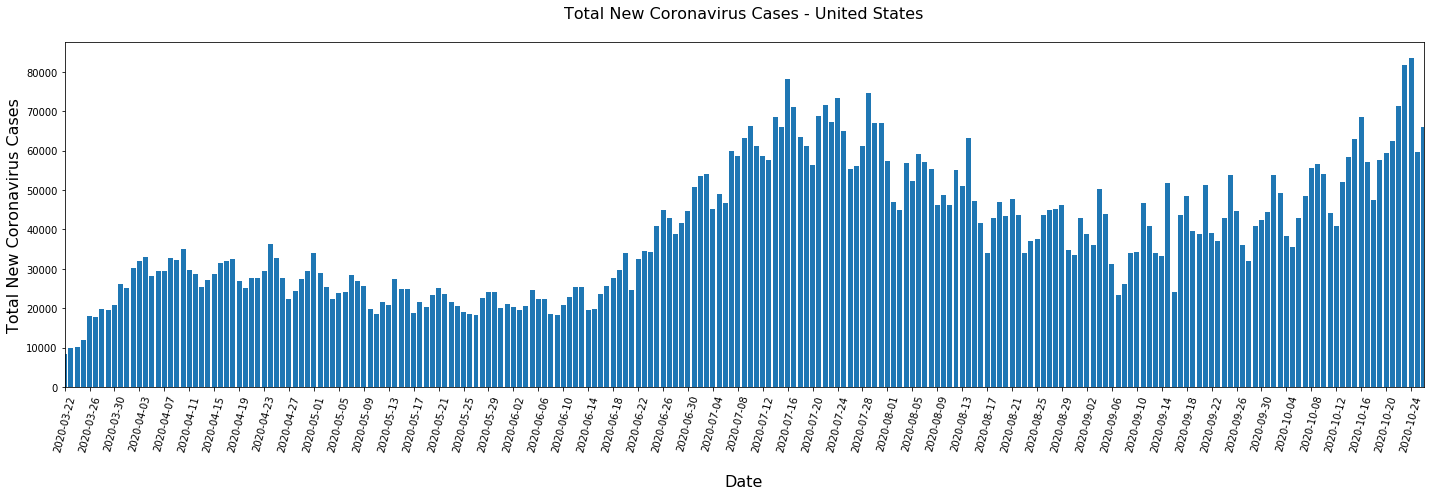

In [16]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

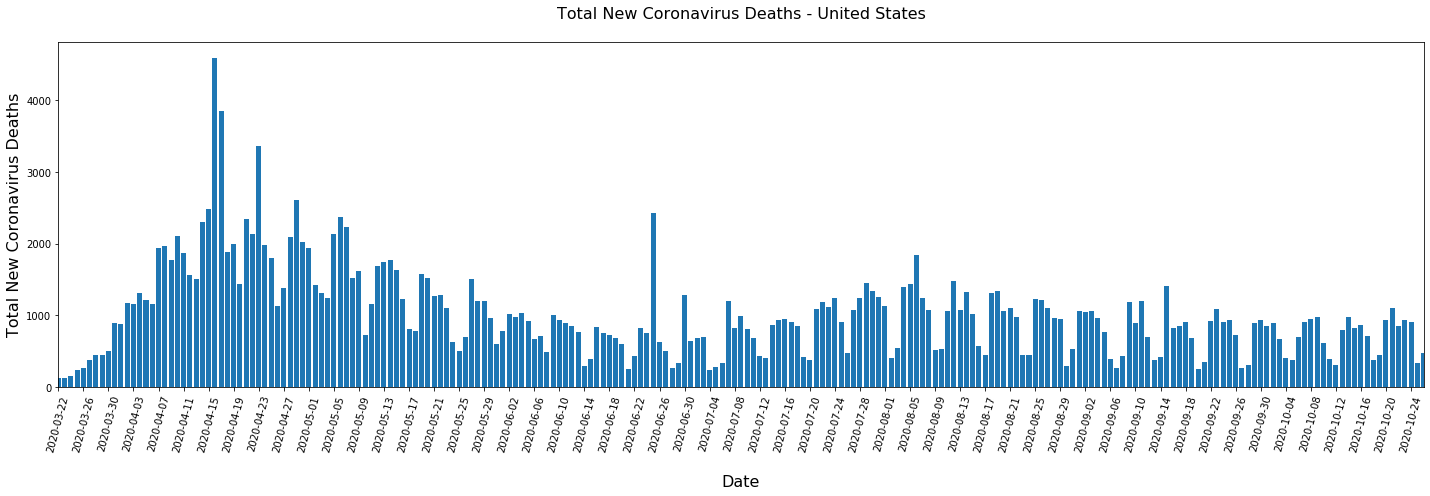

In [17]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [18]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2020-10-26

Total US Cases: 8,633,687
Total New US Cases: 65,951
Total US Deaths: 224,801
Total New US Deaths: 468


### Seven Day Average of New Cases and New Deaths in The United States

In [19]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2020-10-26:

The seven day average for New Cases in the United States: 69,117.0
The seven day average for New Deaths in the United States: 789.0


### Top 5 States With the Most Coronavirus Cases

In [20]:
# Show the top 5 states having the most coronavirus cases
# state_group = covid_state_df.groupby('State')
# covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
# covid_state_df
# last_state_date_df = state_group.last()

last_state_date_df.sort_values(by=['Date', 'Total Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(5)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
California,910438,3842,17386,28,0.0191,36.1162,-119.6816,2020-10-26
Texas,898302,6296,17978,23,0.0200,31.0545,-97.5635,2020-10-26
Florida,782013,3377,16449,20,0.0210,27.7663,-81.6868,2020-10-26
New York,496655,1191,33424,2,0.0673,42.1657,-74.9481,2020-10-26
Illinois,383687,4729,9792,17,0.0255,40.3495,-88.9861,2020-10-26


### Total Cases by County Heatmap

In [21]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [22]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [23]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

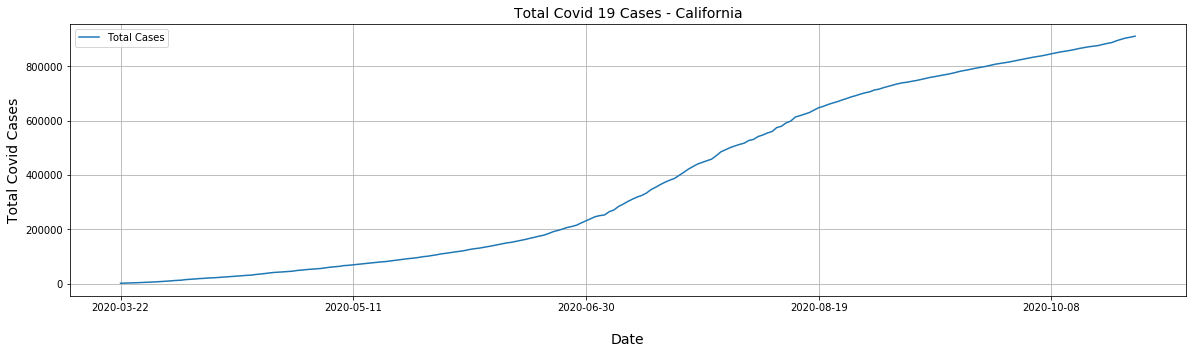

In [25]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [26]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-10-26: 910,438


### Plot New Coronavirus cases in California

In [27]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

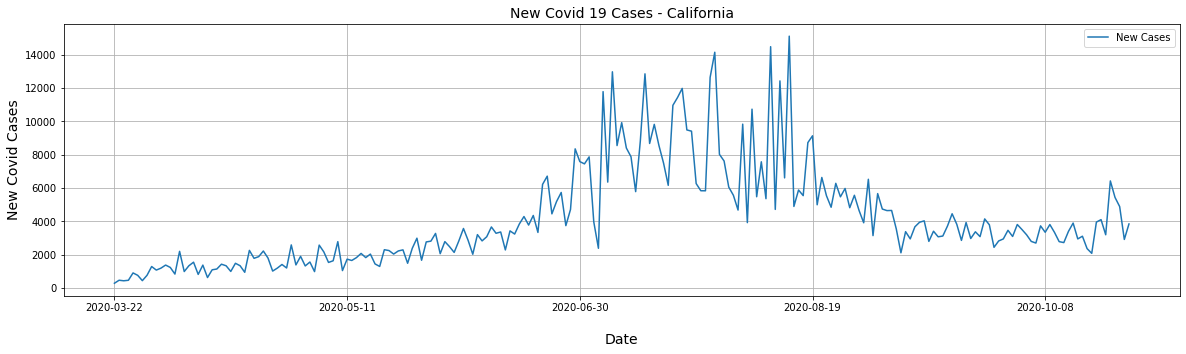

In [28]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [29]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-26: 3,842


### Plot Total Coronavirus Deaths in California

In [30]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

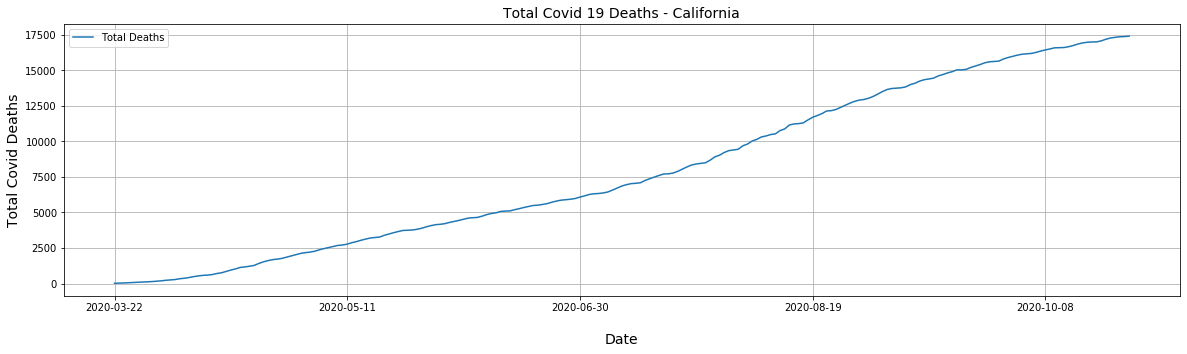

In [31]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [32]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-26: 17,386


### Plot New Coronavirus Deaths in California

In [33]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

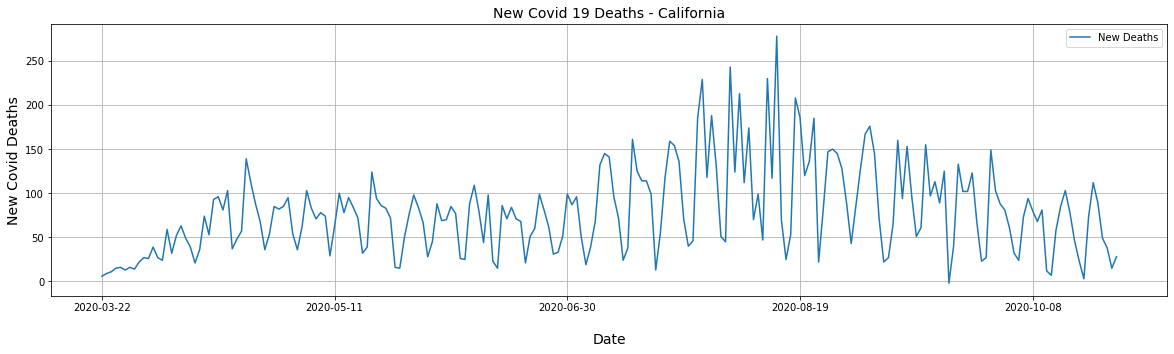

In [34]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [35]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-26: 28


### Seven Day Average of New Cases and New Deaths in California

In [36]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2020-10-26

The 7 day average of New Cases in CA is 4,399.0
The 7 day average of New Deaths in CA is 58.0


### Total Coronavirus Cases - Los Angeles County, CA

In [37]:
# Create a dataframe based on county information
covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
county_group = covid_county_df.groupby(['State', 'County'])
covid_county_last_df = county_group.first()
covid_county_last_df.sort_values(by=['State', 'Total Cases'], ascending=[False, False], inplace=True)

# Show the total coronavirus cases by county in California
california_cases_by_county_df = covid_county_last_df.loc['California']
california_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Los Angeles,300614,854,7000,7,2020-10-26,34.308284,-118.228241
Riverside,66732,830,1295,16,2020-10-26,33.743150,-115.993358
San Bernardino,62774,155,1072,0,2020-10-26,34.840603,-116.177469
Orange,58725,152,1447,0,2020-10-26,33.701475,-117.764600
San Diego,54941,358,870,0,2020-10-26,33.034846,-116.736533
Kern,33881,68,416,0,2020-10-26,35.343294,-118.727780
Fresno,30858,106,436,0,2020-10-26,36.757339,-119.646695
Sacramento,25445,73,484,0,2020-10-26,38.451068,-121.342537
Santa Clara,24313,169,388,0,2020-10-26,37.231049,-121.697046


### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

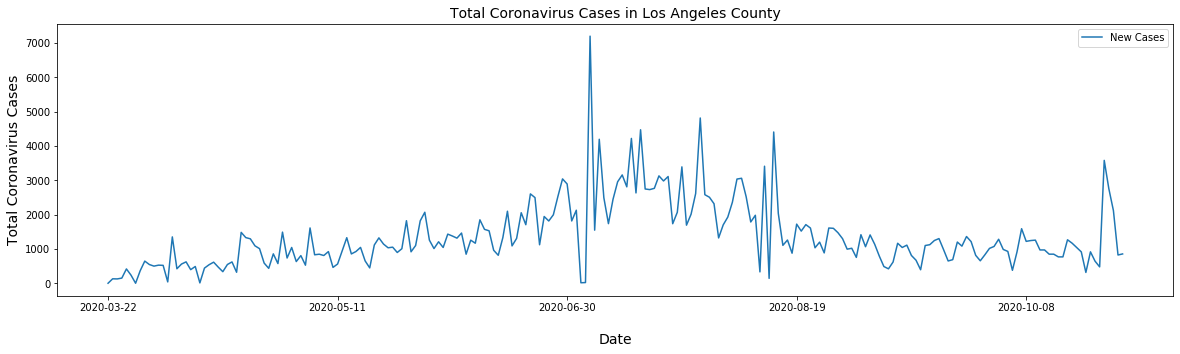

In [38]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [39]:
new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['California']['New Cases']
date = new_cases_df.loc['California']['Date']
tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

There were 854 new cases reported for a total of 300,614 cases on 2020-10-26 in LA County, CA.


### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [40]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2020-10-26

The 7 day average of New Cases in Los Angeles County, CA: 1,607.0
The 7 day average of New Deaths in Los Angeles County, CA: 18.0


### Total Coronavirus cases in Indiana

In [41]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

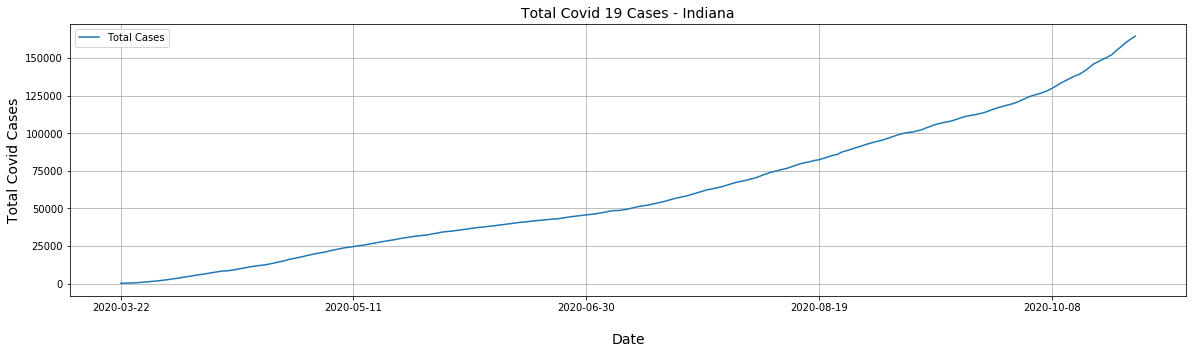

In [42]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [43]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2020-10-26: 164,581


### Plot New Coronavirus cases in Indiana

In [44]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

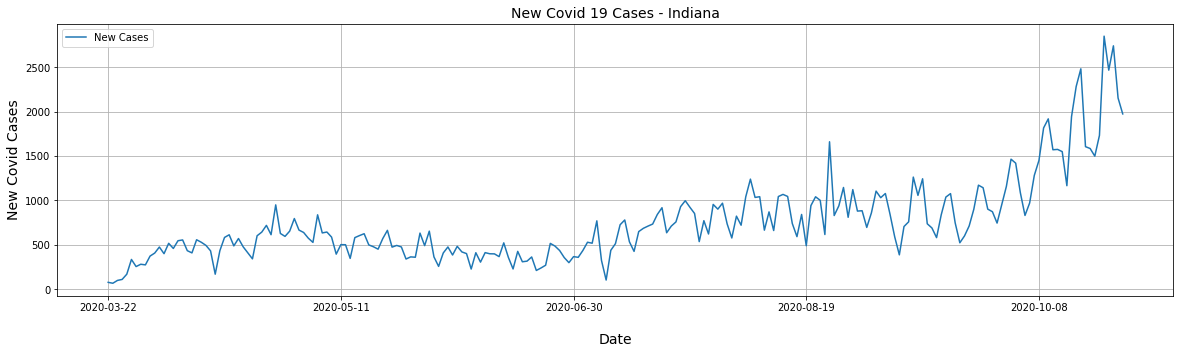

In [45]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [46]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2020-10-26: 1,974


### Plot Total Coronavirus Deaths in Indiana

In [47]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

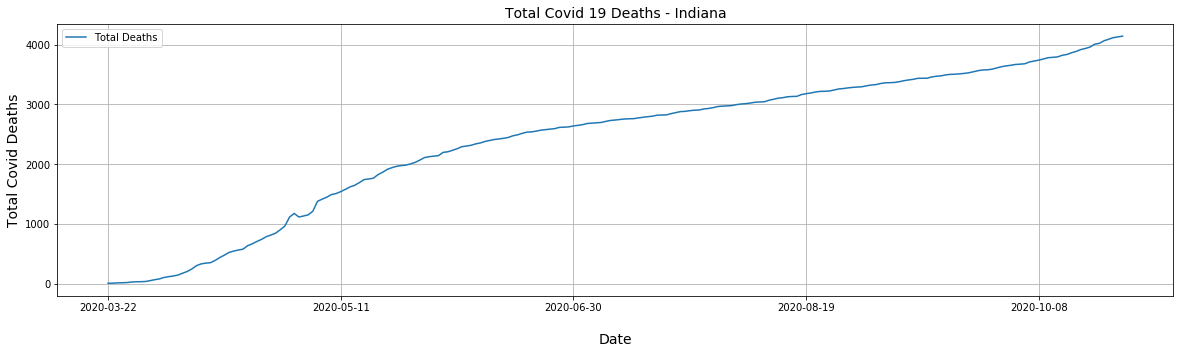

In [48]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [49]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2020-10-26: 4,143


### Plot New Coronavirus Deaths in Indiana

In [50]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

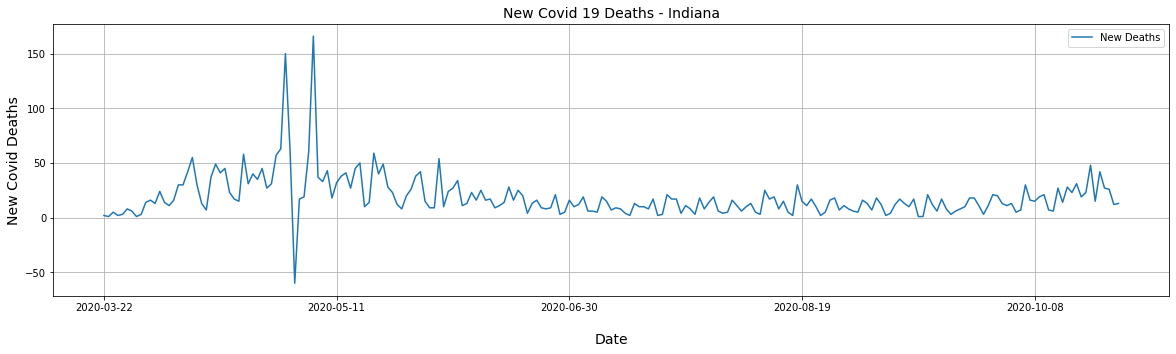

In [51]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [52]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2020-10-26: 13


### Seven Day Average of New Cases and New Deaths in Indiana

In [53]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2020-10-26

The 7 day average of New Cases in IN is 2,202.0
The 7 day average of New Deaths in IN is 26.0


### Coronavirus in Fulton County, IN

In [54]:
# Show the total coronavirus cases by county in Indiana
indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
indiana_cases_by_county_df

,Total Cases,New Cases,Total Deaths,New Deaths,Date,Latitude,Longitude
County,,,,,,,
Marion,26055,184,792,0,2020-10-26,39.781636,-86.138263
Lake,14436,214,358,0,2020-10-26,41.418743,-87.382776
St. Joseph,9606,74,168,2,2020-10-26,41.617568,-86.290408
Elkhart,9271,115,138,1,2020-10-26,41.597612,-85.858757
Allen,8647,95,231,1,2020-10-26,41.091943,-85.068006
Hamilton,6400,65,115,1,2020-10-26,40.073065,-86.052447
Vanderburgh,6171,81,62,0,2020-10-26,38.026588,-87.587631
Tippecanoe,3967,49,15,0,2020-10-26,40.388727,-86.894140
Porter,3475,59,50,0,2020-10-26,41.459869,-87.068489


### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

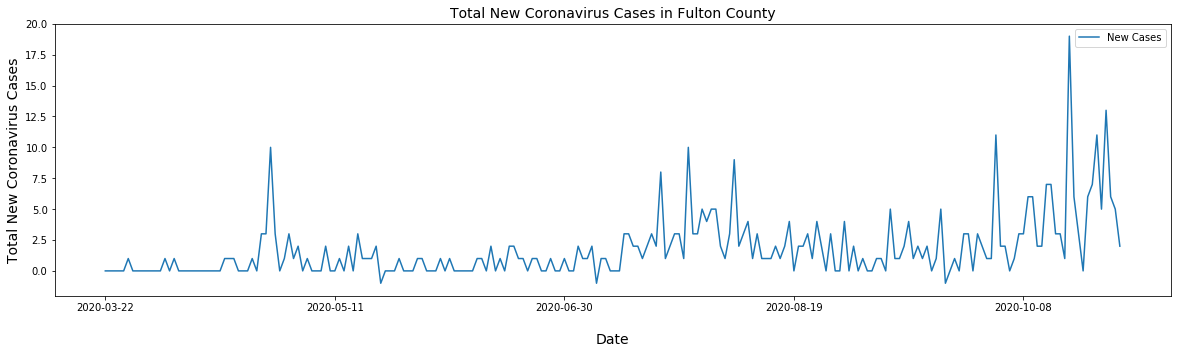

In [55]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [56]:
new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
new_cases = new_cases_df.loc['Indiana']['New Cases']
date = new_cases_df.loc['Indiana']['Date']
tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, CA.')

There were 2 new cases reported for a total of 378 cases on 2020-10-26 in Fulton County, CA.


### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [57]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2020-10-26

The 7 day average of New Cases in Fulton County, IN is 7.0
The 7 day average of New Deaths in Fulton County, IN is 0.43
